In [10]:
import pymysql
import matplotlib.pyplot as plt

#Σύνδεση με τη βάση δεδομένων
import mysql.connector
conn= mysql.connector.connect(host='localhost', user='root', password='map2024', database='hotelreservations')
print (conn)
cursor = conn.cursor()
cursorobject=conn.cursor()

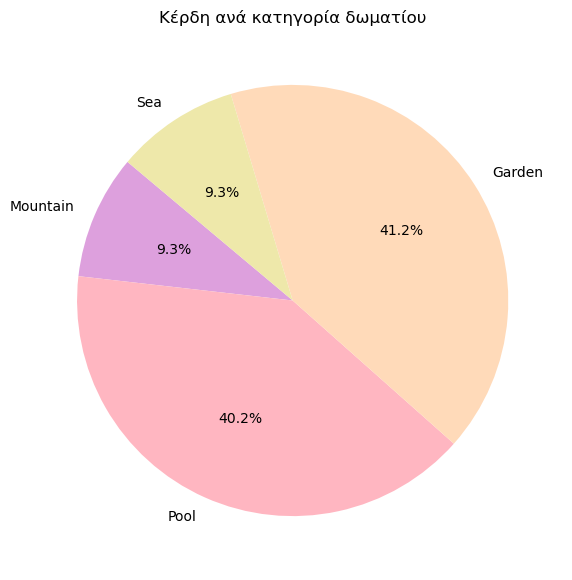

In [11]:
query_profitsbyroomview ='SELECT roomview, SUM(earned) AS total_earned FROM (SELECT ro.roomview, ro.size, (DATEDIFF(COALESCE(res.checkoutdate, CURDATE()), res.checkindate) * ro.size * 1) + ((365 - DATEDIFF(COALESCE(res.checkoutdate, CURDATE()), res.checkindate)) * ro.size * 0.3) AS earned FROM rooms ro  LEFT JOIN reservations res ON ro.roomid = res.roomid) AS earnings GROUP BY roomview;'
cursor.execute(query_profitsbyroomview)
results_profitsbyroomview = cursor.fetchall()

#Δημιουργία διαγράμματος πίτας
labels = [row[0] for row in results_profitsbyroomview]
sizes = [row[1] for row in results_profitsbyroomview]
plt.figure(figsize=(10, 7))
pastel_colors = ['plum', 'lightpink', 'peachpuff', 'palegoldenrod']
plt.pie(sizes, labels=labels, colors=pastel_colors, autopct='%1.1f%%', startangle=140)
plt.title('Κέρδη ανά κατηγορία δωματίου')
plt.show()

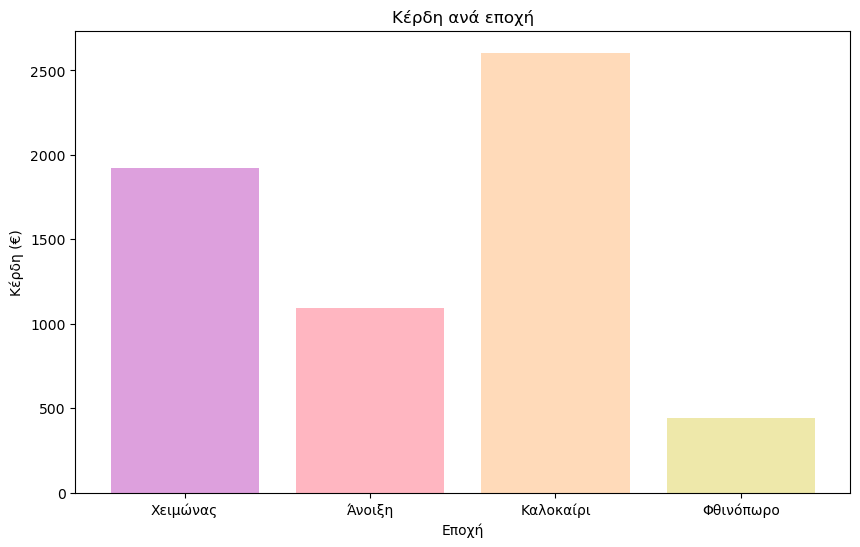

In [12]:
query_profitsbyseason ="SELECT CASE WHEN MONTH(checkindate) IN (12, 1, 2) THEN 'Χειμώνας' WHEN MONTH(checkindate) IN (3, 4, 5) THEN 'Άνοιξη' WHEN MONTH(checkindate) IN (6, 7, 8) THEN 'Καλοκαίρι' WHEN MONTH(checkindate) IN (9, 10, 11) THEN 'Φθινόπωρο' END AS Εποχή, SUM(finalprice) AS Σύνολο FROM reservations GROUP BY Εποχή ORDER BY FIELD(Εποχή, 'Χειμώνας', 'Άνοιξη', 'Καλοκαίρι', 'Φθινόπωρο');"
cursor.execute(query_profitsbyseason)
results_profitsbyseason = cursor.fetchall()

#Δημιουργία ιστογρ΄΄αμματος
seasons = [row[0] for row in results_profitsbyseason]
earnings = [row[1] for row in results_profitsbyseason]
plt.figure(figsize=(10, 6))
pastel_colors = ['plum', 'lightpink', 'peachpuff', 'palegoldenrod']
plt.bar(seasons, earnings, color=pastel_colors)
plt.title('Κέρδη ανά εποχή')
plt.xlabel('Εποχή')
plt.ylabel('Κέρδη (€)')
plt.show()

In [13]:
# Κλείσιμο σύνδεσης με τη βάση δεδομένων
cursor.close()
conn.close()